In [12]:
#build basic chatbot with langgraph(Graph api)
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver


In [13]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [14]:
graph_builder

In [15]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [16]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="llama-3.1-8b-instant")
print(llm)

profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True} client=<groq.resources.chat.completions.Completions object at 0x000001FF70941520> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001FF70E4CFE0> model_name='llama-3.1-8b-instant' model_kwargs={} groq_api_key=SecretStr('**********')


In [17]:
#node functionality
memory=MemorySaver()
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [18]:
graph_builder=StateGraph(State)
graph_builder.add_node("llmchatbot",chatbot)

graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

#compile the graph
graph=graph_builder.compile(checkpointer=memory)

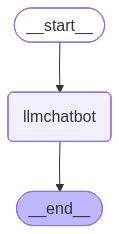

In [14]:
#display the graph
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


In [8]:
response=graph.invoke({"messages":"what is machine learning"})

In [18]:
response["messages"][-1].content

"**Machine Learning (ML)** is a subfield of artificial intelligence (AI) that involves the development of algorithms and statistical models that enable machines to learn from data, make decisions, and improve their performance over time. The goal of ML is to enable computers to perform tasks without being explicitly programmed for each specific task.\n\n**Key Characteristics of Machine Learning:**\n\n1. **Learning from data**: ML algorithms use data to learn and make predictions or decisions.\n2. **Improvement over time**: As ML models learn from data, they improve their performance over time.\n3. **Autonomy**: ML models can operate independently without human intervention.\n\n**Types of Machine Learning:**\n\n1. **Supervised Learning**: The algorithm is trained on labeled data, where the correct output is already known.\n2. **Unsupervised Learning**: The algorithm is trained on unlabeled data, and it must find patterns or relationships on its own.\n3. **Reinforcement Learning**: The a

In [11]:
for event in graph.stream({"messages":"Hi, How are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

I'm doing well, thank you for asking. I'm a large language model, so I don't have emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?


In [22]:
config={"configurable":{"thread_id":"1"}}
res=graph.invoke({"messages":"Hi my name is vansh"},config=config)
res

{'messages': [HumanMessage(content='Hi my name is vansh', additional_kwargs={}, response_metadata={}, id='c69c11cf-8bd2-4686-846d-b155cd79b33a'),
  AIMessage(content='Nice to meet you, Vansh. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 41, 'total_tokens': 66, 'completion_time': 0.02376293, 'completion_tokens_details': None, 'prompt_time': 0.002010662, 'prompt_tokens_details': None, 'queue_time': 0.051261768, 'total_time': 0.025773592}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b77ff-72eb-7482-aa0f-203d95812fd5-0', usage_metadata={'input_tokens': 41, 'output_tokens': 25, 'total_tokens': 66})]}

In [24]:
res["messages"][-1].content

'Nice to meet you, Vansh. Is there something I can help you with or would you like to chat?'

In [25]:
res2=graph.invoke({"messages":"Hey what is my name?"},config=config)
res2["messages"][-1].content

'Your name is Vansh.'